In [1]:
import pandas as pd
import os
import numpy as np
import seaborn
from glob import glob
from datetime import datetime


In [13]:
data = pd.read_csv('data/cleaned-vehicles-2021-04-04-2021-05-04.csv')
data.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,paint_color,image_url,description,county,state,lat,long,posting_date,posting_year,car_age
0,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 12:31:18-05:00,2021.0,7.0
1,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 12:31:08-05:00,2021.0,11.0
2,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 12:31:25-05:00,2021.0,1.0
3,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04 10:41:31-05:00,2021.0,4.0
4,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03 14:02:03-05:00,2021.0,8.0


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Convert to DataFrame
df1 = pd.DataFrame(data)
df = df1.sample(frac=0.1, random_state=42)

# Define features and target
X = df.drop(columns=["price","url","region_url","image_url","lat","long","description"])
y = df["price"]

# Use pandas' automatic handling of categoricals
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)





NameError: name 'tools' is not defined

In [45]:
from sklearn.metrics import mean_absolute_error, r2_score
# Predict on the test set
y_pred_test = rf_model.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred_test)  # R-squared

# Combine actual and predicted values for analysis
test_results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_test
})
print(test_results)

      Actual  Predicted
0      40426   42850.12
1       1995    4253.12
2      10995    9608.46
3      18983   15401.38
4       6995    6869.30
...      ...        ...
4255   22995   17906.89
4256   10950   14356.41
4257   29990   35466.97
4258    6500    6266.29
4259   32990   32990.00

[4260 rows x 2 columns]


C:\Users\arturtam\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
differences = test_results["Actual"] - test_results["Predicted"]

# Add as a DataFrame for better representation
differences_df = pd.DataFrame({
    "Actual": test_results["Actual"],
    "Predicted": test_results["Predicted"],
    "Difference": differences
})
print(differences_df)

      Actual  Predicted  Difference
0      40426   42850.12    -2424.12
1       1995    4253.12    -2258.12
2      10995    9608.46     1386.54
3      18983   15401.38     3581.62
4       6995    6869.30      125.70
...      ...        ...         ...
4255   22995   17906.89     5088.11
4256   10950   14356.41    -3406.41
4257   29990   35466.97    -5476.97
4258    6500    6266.29      233.71
4259   32990   32990.00        0.00

[4260 rows x 3 columns]


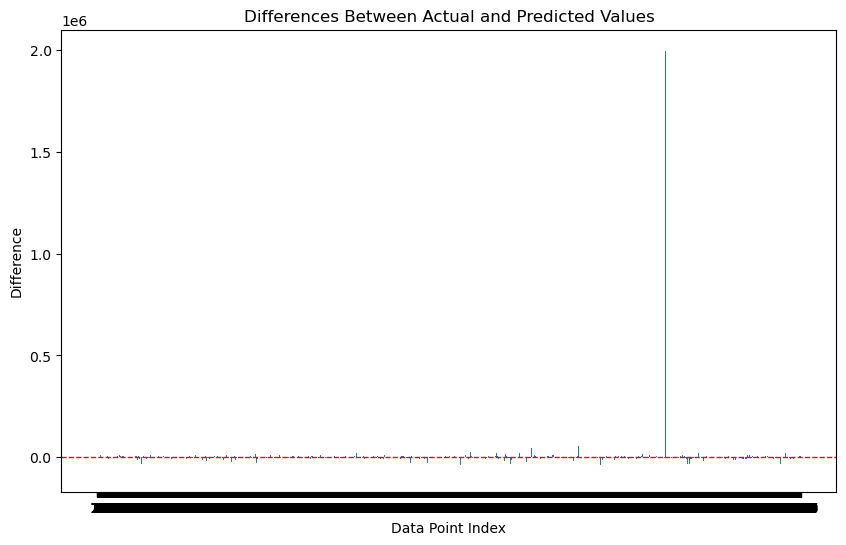

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(differences)), differences, tick_label=range(1, len(differences) + 1))
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Differences Between Actual and Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Difference')
plt.show(300)

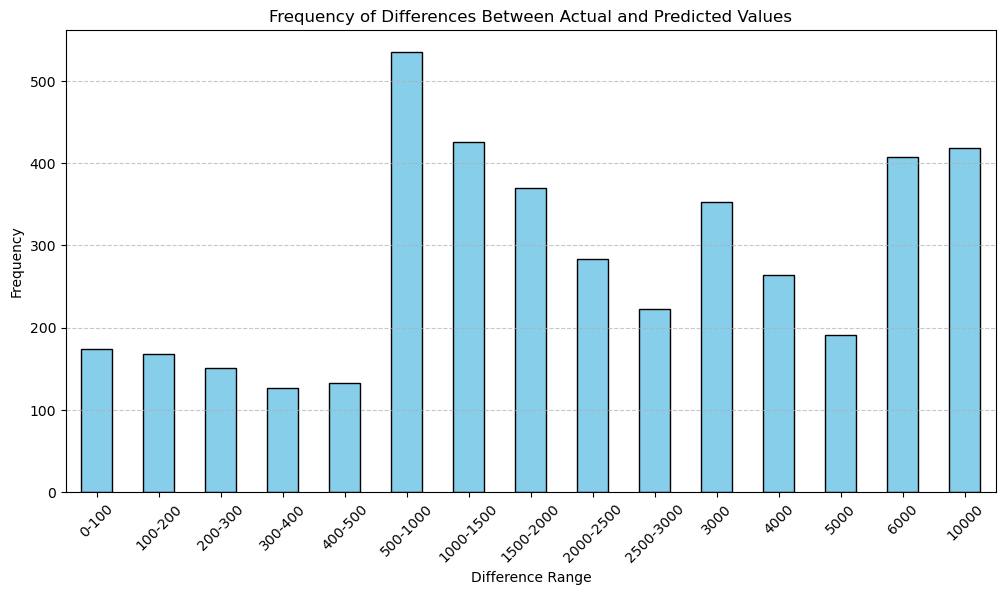

In [69]:
bins = [0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000,4000,5000,6000,10000, np.inf]
labels = [
    "0-100", "100-200", "200-300", "300-400", "400-500", 
    "500-1000", "1000-1500", "1500-2000", "2000-2500", "2500-3000", "3000","4000","5000","6000","10000"
]
# Categorize differences into bins and count the occurrences
bin_counts = pd.cut(abs(differences), bins=bins, labels=labels).value_counts()

# Plot the distribution of differences
plt.figure(figsize=(12, 6))
bin_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Differences Between Actual and Predicted Values')
plt.xlabel('Difference Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


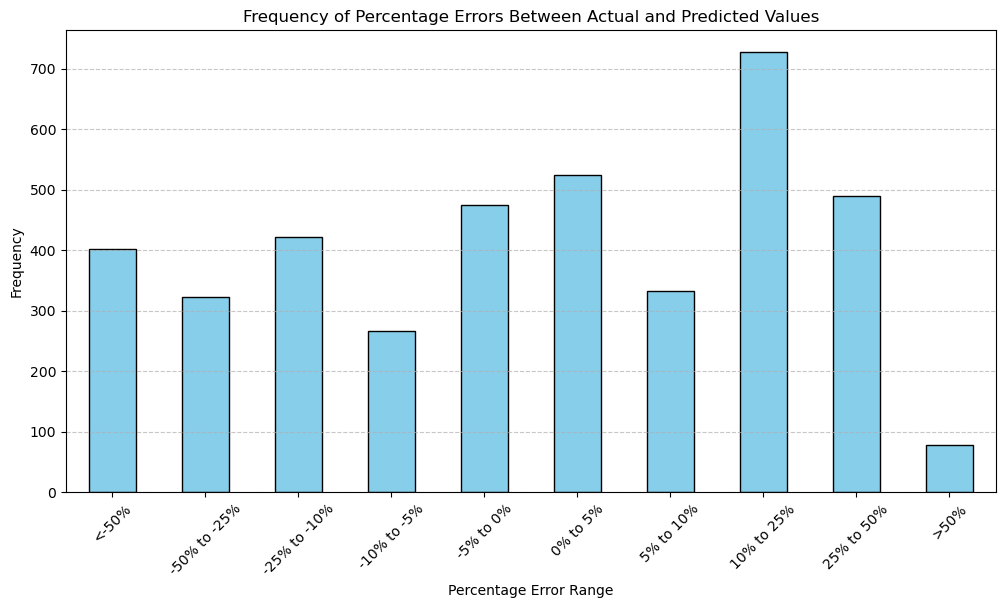

In [75]:
# Calculate percentage difference for each line
percentage_differences = (differences_df["Difference"] / differences_df["Actual"]) * 100

# Categorize percentage differences into bins
percentage_bins = [-np.inf, -50, -25, -10, -5, 0, 5, 10, 25, 50, np.inf]
percentage_labels = [
    "<-50%", "-50% to -25%", "-25% to -10%", "-10% to -5%",
    "-5% to 0%", "0% to 5%", "5% to 10%", "10% to 25%", 
    "25% to 50%", ">50%"
]

percentage_bin_counts = pd.cut(percentage_differences, bins=percentage_bins, labels=percentage_labels).value_counts()

# Display percentage bins and frequencies
percentage_bin_counts_df = pd.DataFrame({
    "Percentage Range": percentage_labels,
    "Frequency": percentage_bin_counts.sort_index().values
})

# Plot the percentage error ranges as a bar chart
plt.figure(figsize=(12, 6))
percentage_bin_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Percentage Errors Between Actual and Predicted Values')
plt.xlabel('Percentage Error Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

